In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("E:\\Notebooks\\breast_cancer_logistic_regression.csv")
df = df.dropna()
df.head()

print(df.shape)
m = df.shape[0]
m_train = int(m*0.7)
X_train = df.iloc[:m_train, 0:5] #take 70 percent data for training
Y_train = df.iloc[:m_train, 5]

X_test = df.iloc[m_train+1: , 0:5]
Y_test = df.iloc[m_train+1: , 5]
print(Y_test.shape)

(569, 6)
(170,)


In [88]:
#sigmoid
def sigmoid(x):
    return 1/(1 +  np.exp(-1*x))

In [89]:
#prediction function
def predict(X, theta):
    #print("Multiplying X and theta. X shape: ", X.shape, " Theta shape: ", theta.shape)
    return sigmoid(np.matmul(X,theta))

In [90]:
def calcCost(Y, predicted):
    #log loss error function to be defined here
    error = -1*Y*np.log(predicted) - (1-Y)*np.log(1-predicted)
    cost = np.sum(error)/len(Y)
    return cost
    

In [91]:
def gradientDescent(X, Y, learning_rate, iterations):
    theta = np.zeros(X.shape[1])
    theta = theta.reshape(X.shape[1],1)
    costs = []
    for i in range(0, iterations):
        predicted = predict(X, theta)
        #print("Prediction shape", predicted.shape, theta)
        #print(predicted)
        errors = predicted - Y
        #print(Y)
        costs.append(calcCost(Y, predicted))
        #print("Error shape: ", errors.shape)
        #print("X shape: ", X.T.shape)
        gradient = (1/len(Y))*np.matmul(X.T, errors)
        #print("Gradient Shape ", gradient, gradient.shape)
        theta = theta - learning_rate*gradient
        #print("New theta:  ", theta)
    return theta, costs
    

In [98]:
#Start training

X = X_train
Y = Y_train

bias = np.ones(len(X))
bias = pd.Series(bias)
X = pd.merge(bias.to_frame(), X, left_index=True, right_index=True)
X = np.array(X)

Y = np.array(Y)
Y = Y.reshape(len(Y),1)

# theta = np.zeros(X.shape[1])
# theta = theta.reshape(2,1)

# print("Theta shape: ", theta.shape)
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

learning_rate = 0.000009 #the less is the learning rate is, the less steep the cost curve will be. That means we will slowly move towards the minimum
iterations = 3500
theta, costs = gradientDescent(X, Y, learning_rate, iterations)
print("Final theta ", theta)
# print(costs)

X shape:  (398, 6)
Y shape:  (398, 1)
Final theta  [[ 0.00202007]
 [ 0.01411919]
 [ 0.01729799]
 [ 0.08033314]
 [-0.0123068 ]
 [ 0.00012426]]


3500


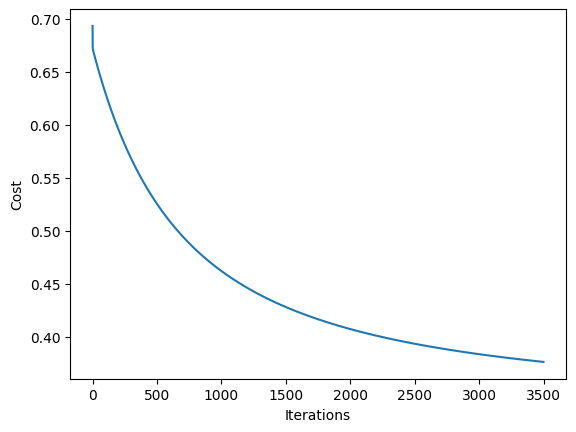

In [99]:
#Plot cost graph
plt.plot(costs, label='Cost')
plt.xlabel(xlabel = "Iterations")
plt.ylabel(ylabel = "Cost")
print(len(costs))

In [100]:
#Check on test data and check accuracy
X = X_test
Y = Y_test

bias = np.ones(len(X))
X['bias'] = bias

cols = list(X.columns)
cols.remove('bias')

# Step 2: Insert the new_column at the beginning of the list
cols.insert(0, 'bias')

# Step 3: Reorder the DataFrame with the new column at the beginning
X = X[cols]

Y = np.array(Y)
Y = Y.reshape(len(Y),1)

#z = np.matmul(X, theta) + bias
prediction = predict(X, theta)
prediction =  prediction > 0.5 #if prediction is > 0.5 then label as 1 else 0
prediction = np.array(prediction, dtype='int64')

accuracy = (1 - np.sum(np.absolute(prediction - Y))/Y.shape[0])*100
print("Prediction accuracy on test data is", accuracy)

Prediction accuracy on test data is 88.23529411764706
